In [27]:
from pathlib import Path 
import pandas as pd
import os
import plotly.express as px
import panel as pn
import hvplot.pandas
import numpy as np

%matplotlib inline

In [20]:
confortability_income = pd.read_csv(Path('confortability_income_threshold.csv'), index_col = 'State')
confortability_income_transpose = confortability_income.transpose()
confortability_income_transpose.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2019,56515,60203,53295,47555,47722,60275,57704,58855,50654,51205,...,60201,46843,51982,70108,35261,62957,51780,37134,56468,53726
2018,43187,57301,43749,48387,56507,105548,49688,55409,50466,49879,...,45410,48756,48979,51250,52649,52806,51132,38879,50564,42825
2017,45824,54400,51341,44571,57315,53792,59502,53112,52206,47946,...,45410,46785,48160,47922,51977,54264,51271,44823,51120,47951
2016,47096,57140,43523,43641,58580,53685,53542,48572,49478,43969,...,45410,41857,45757,53395,51417,53454,52935,45314,46258,46199
2015,46672,56657,43147,43250,58053,53203,53079,48134,49008,43582,...,44978,41451,45321,52877,50970,52968,52473,44878,45841,45810


In [21]:
rent_per_state = pd.read_csv(Path('rent_per_state.csv'), index_col = 'State')
rent_per_state_transpose = rent_per_state.transpose()
rent_per_state_transpose.head()

State,Alaska,Alabama,Arkansas,Arizona,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2019,1200,747,709,972,1358,1125,1123,1076,1077,927,...,696,808,952,948,945,1166,1120,681,813,828
2018,917,711,582,989,1608,1970,967,1013,1073,903,...,525,841,897,693,1411,978,1106,713,728,660
2017,973,675,683,911,1631,1004,1158,971,1110,868,...,525,807,882,648,1393,1005,1109,822,736,739
2016,1000,709,579,892,1667,1002,1042,888,1052,796,...,525,722,838,722,1378,990,1145,831,666,712
2015,991,703,574,884,1652,993,1033,880,1042,789,...,520,715,830,715,1366,981,1135,823,660,706


In [22]:
poverty_income_threshold = pd.read_csv(Path('poverty_income_threshold.csv'), index_col = 'State')
poverty_income_threshold_transpose = poverty_income_threshold.transpose()
poverty_income_threshold_transpose.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2019,26370,26370,26370,26370,26370,26370,26370,26370,26370,26370,...,26370,26370,26370,26370,26370,26370,26370,26370,26370,26370
2018,25701,25701,25701,25701,25701,25701,25701,25701,25701,25701,...,25701,25701,25701,25701,25701,25701,25701,25701,25701,25701
2017,25094,25094,25094,25094,25094,25094,25094,25094,25094,25094,...,25094,25094,25094,25094,25094,25094,25094,25094,25094,25094
2016,24563,24563,24563,24563,24563,24563,24563,24563,24563,24563,...,24563,24563,24563,24563,24563,24563,24563,24563,24563,24563
2015,24257,24257,24257,24257,24257,24257,24257,24257,24257,24257,...,24257,24257,24257,24257,24257,24257,24257,24257,24257,24257


In [23]:
print(confortability_income.shape, rent_per_state.shape, poverty_income_threshold.shape)

(50, 10) (50, 10) (50, 10)


In [24]:
confortability_stats = pd.DataFrame({'avg':confortability_income.pct_change(axis=1).mean(axis=1), 'std':confortability_income.pct_change(axis=1).std(axis=1)})
confortability_stats.head()

,avg,std
State,,
Alabama,-0.025467,0.084139
Alaska,-0.014562,0.031455
Arizona,-0.026810,0.100825
Arkansas,-0.018354,0.028002
California,0.015320,0.066018


In [25]:
rent_per_state_stats = pd.DataFrame({'avg':rent_per_state.pct_change(axis=1).mean(axis=1), 'std':rent_per_state.pct_change(axis=1).std(axis=1)})
rent_per_state_stats.head()

,avg,std
State,,
Alaska,-0.025466,0.084141
Alabama,-0.014560,0.031455
Arkansas,-0.026809,0.100827
Arizona,-0.018356,0.028001
California,0.015322,0.066020


In [26]:
poverty_income_threshold_stats = pd.DataFrame({'avg':poverty_income_threshold.pct_change(axis=1).mean(axis=1), 'std':poverty_income_threshold.pct_change(axis=1).std(axis=1)})
poverty_income_threshold_stats.head()

,avg,std
State,,
Alabama,-0.018352,0.008606
Alaska,-0.018352,0.008606
Arizona,-0.018352,0.008606
Arkansas,-0.018352,0.008606
California,-0.018352,0.008606


In [28]:
# Create a list of average values
confortability_stats_avg = confortability_stats['avg']
rent_per_state_stats_avg = rent_per_state_stats['avg']
poverty_income_threshold_stats_avg = poverty_income_threshold_stats['avg']

# Create a list for standard deviations
confortability_stats_std = confortability_stats['std']
rent_per_state_stats_std = rent_per_state_stats['std']
poverty_income_threshold_stats_std = poverty_income_threshold_stats['std']

In [58]:
# Setup Monte Carlo for Confortability Income
# Doing 100 simulations for each state; Will be saving the average of 100 simulations for each year.
num_simulations = 100
num_years = 10

# Initialize Dataframe
confortability_monte_carlo = pd.DataFrame()

x = 0
# Run the Monte Carlo Simulation
for x in range(50):
    # Getting the last unemployment from each state
    index = confortability_income.index[x]
    last_income = confortability_income.loc[index, '2019']
    
    # Running Monte Carlo Simulation
    for num in range(num_years):
        # Initialize empty list to hold simulated rates for each year
        simulated_income = [last_income]
        # Create variable to hold random values to use for simulation
        random = np.random.normal(confortability_stats_avg[x], confortability_stats_std[x], num_simulations)
        
        for year in range(num_years):
            # This will run 10 times
            # Initialize empty list to hold rates
            lista = []
            
            for i in range(num_simulations):
                # This will run 100 times
                income = simulated_income[-1]*(1+random[i])
                lista.append(income)
                
            # Append the average of each simulation to simulated_income[]
            simulated_income.append(sum(lista)/len(lista))
            
    confortability_monte_carlo[index] = pd.Series(simulated_income)
    x += 1

In [59]:
confortability_monte_carlo

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,56515.000000,60203.000000,53295.000000,47555.000000,47722.000000,60275.000000,57704.000000,58855.000000,50654.000000,51205.000000,...,60201.000000,46843.000000,51982.000000,70108.000000,35261.000000,62957.000000,51780.000000,37134.000000,56468.000000,53726.000000
1,54453.425233,59401.937848,51686.214834,46927.608187,48053.796911,62743.936730,57290.189971,57143.186353,49995.962508,49848.820839,...,57491.668422,46024.392818,50610.718587,68885.307960,36694.124149,61189.788049,51186.485666,38066.312657,54918.073981,52411.893887
2,52467.053342,58611.534642,50125.993131,46308.493537,48387.900708,65314.004088,56879.347478,55481.161270,49346.473470,48528.560474,...,54904.269662,45220.091247,49275.611478,67683.939817,38185.495223,59472.181988,50599.774330,39022.032620,53410.690122,51129.930030
3,50553.141049,57831.648555,48612.868933,45697.546849,48724.327430,67989.344506,56471.451241,53867.476638,48705.421832,47243.267584,...,52433.316163,44429.845287,47975.724399,66503.523681,39737.480571,57802.789375,50019.788016,40001.747570,51944.680731,49879.322249
4,48709.045146,57062.139646,47145.420534,45094.660364,49063.093226,70774.270095,56066.480132,52300.726461,48072.697988,45992.016046,...,50073.567334,43653.409311,46710.128248,65343.694146,41352.543758,56180.256849,49446.449638,41006.059940,50518.910167,48659.303593
5,46932.218845,56302.869836,45722.269147,44499.727745,49404.214361,73673.269597,55664.413173,50779.545639,47448.193751,44773.904265,...,47820.018436,42890.541980,45477.918431,64204.092178,43033.248476,54603.269043,48879.682998,42035.587293,49132.273961,47469.125871
6,45220.208262,55553.702882,44342.077603,43912.644055,49747.707210,76691.015617,55265.229538,49302.608773,46831.802343,43588.054526,...,45667.889966,42141.006175,44278.214221,63084.365008,44782.262617,53070.547508,48319.412768,43090.962692,47783.697957,46308.059190
7,43570.649025,54814.504357,43003.549098,43333.305744,50093.588263,79832.372155,54868.908551,47868.629017,46223.418370,42433.612358,...,43612.617522,41404.568920,43110.158121,61984.166015,46602.362501,51580.849686,47765.564485,44172.835099,46472.137485,45175.391511
8,41981.263010,54085.141621,41705.425975,42761.610627,50441.874124,83102.402447,54475.429682,46476.356952,45622.937810,41309.745923,...,41649.842122,40681.001312,41972.915257,60903.154627,48496.437289,50132.967893,47218.064539,45281.869764,45196.576547,44070.428213
9,40449.855198,53365.483797,40446.488539,42197.457869,50792.581513,86506.377126,54084.772549,45124.579497,45030.257991,40215.645414,...,39775.400958,39970.078445,40865.672778,59840.996208,50467.493567,48725.728348,46676.840164,46418.748644,43956.027033,42992.491662


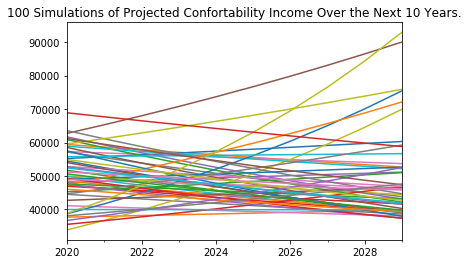

In [99]:
plot_title = f"{num_simulations} Simulations of Projected Confortability Income Over the Next {num_years} Years."
confortability_monte_carlo.plot(legend=None, title=plot_title)

In [61]:
my_index = pd.date_range(start='1/1/2020', end='12/31/2029', freq='Y')
my_index

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [62]:
confortability_monte_carlo.drop(0, inplace=True)

In [63]:
confortability_monte_carlo.index = my_index

In [64]:
confortability_monte_carlo

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-12-31,54453.425233,59401.937848,51686.214834,46927.608187,48053.796911,62743.936730,57290.189971,57143.186353,49995.962508,49848.820839,...,57491.668422,46024.392818,50610.718587,68885.307960,36694.124149,61189.788049,51186.485666,38066.312657,54918.073981,52411.893887
2021-12-31,52467.053342,58611.534642,50125.993131,46308.493537,48387.900708,65314.004088,56879.347478,55481.161270,49346.473470,48528.560474,...,54904.269662,45220.091247,49275.611478,67683.939817,38185.495223,59472.181988,50599.774330,39022.032620,53410.690122,51129.930030
2022-12-31,50553.141049,57831.648555,48612.868933,45697.546849,48724.327430,67989.344506,56471.451241,53867.476638,48705.421832,47243.267584,...,52433.316163,44429.845287,47975.724399,66503.523681,39737.480571,57802.789375,50019.788016,40001.747570,51944.680731,49879.322249
2023-12-31,48709.045146,57062.139646,47145.420534,45094.660364,49063.093226,70774.270095,56066.480132,52300.726461,48072.697988,45992.016046,...,50073.567334,43653.409311,46710.128248,65343.694146,41352.543758,56180.256849,49446.449638,41006.059940,50518.910167,48659.303593
2024-12-31,46932.218845,56302.869836,45722.269147,44499.727745,49404.214361,73673.269597,55664.413173,50779.545639,47448.193751,44773.904265,...,47820.018436,42890.541980,45477.918431,64204.092178,43033.248476,54603.269043,48879.682998,42035.587293,49132.273961,47469.125871
2025-12-31,45220.208262,55553.702882,44342.077603,43912.644055,49747.707210,76691.015617,55265.229538,49302.608773,46831.802343,43588.054526,...,45667.889966,42141.006175,44278.214221,63084.365008,44782.262617,53070.547508,48319.412768,43090.962692,47783.697957,46308.059190
2026-12-31,43570.649025,54814.504357,43003.549098,43333.305744,50093.588263,79832.372155,54868.908551,47868.629017,46223.418370,42433.612358,...,43612.617522,41404.568920,43110.158121,61984.166015,46602.362501,51580.849686,47765.564485,44172.835099,46472.137485,45175.391511
2027-12-31,41981.263010,54085.141621,41705.425975,42761.610627,50441.874124,83102.402447,54475.429682,46476.356952,45622.937810,41309.745923,...,41649.842122,40681.001312,41972.915257,60903.154627,48496.437289,50132.967893,47218.064539,45281.869764,45196.576547,44070.428213
2028-12-31,40449.855198,53365.483797,40446.488539,42197.457869,50792.581513,86506.377126,54084.772549,45124.579497,45030.257991,40215.645414,...,39775.400958,39970.078445,40865.672778,59840.996208,50467.493567,48725.728348,46676.840164,46418.748644,43956.027033,42992.491662
2029-12-31,38974.310639,52655.401753,39225.553916,41640.747962,51145.727267,90049.782715,53696.916919,43812.118856,44445.277575,39150.522472,...,37985.318570,39271.579346,39787.639276,58797.361962,52518.660119,47357.990218,46141.819428,47584.170815,42749.527954,41940.920800


In [65]:
confortability_monte_carlo.to_csv('Resources/confortability_monte_carlo_results.csv')

In [67]:
# Setup Monte Carlo for Rent Per State
# Doing 100 simulations for each state; Will be saving the average of 100 simulations for each year.
num_simulations = 100
num_years = 10

# Initialize Dataframe
rent_per_state_monte_carlo = pd.DataFrame()

x = 0
# Run the Monte Carlo Simulation
for x in range(50):
    # Getting the last unemployment from each state
    index = rent_per_state.index[x]
    last_rent = rent_per_state.loc[index, '2019']
    
    # Running Monte Carlo Simulation
    for num in range(num_years):
        # Initialize empty list to hold simulated rates for each year
        simulated_rent = [last_rent]
        # Create variable to hold random values to use for simulation
        random = np.random.normal(rent_per_state_stats_avg[x], rent_per_state_stats_std[x], num_simulations)
        
        for year in range(num_years):
            # This will run 10 times
            # Initialize empty list to hold rates
            lista = []
            
            for i in range(num_simulations):
                # This will run 100 times
                rent = simulated_rent[-1]*(1+random[i])
                lista.append(rent)
                
            # Append the average of each simulation to simulated_income[]
            simulated_rent.append(sum(lista)/len(lista))
            
    rent_per_state_monte_carlo[index] = pd.Series(simulated_rent)
    x += 1

In [68]:
rent_per_state_monte_carlo

,Alaska,Alabama,Arkansas,Arizona,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1200.000000,747.000000,709.000000,972.000000,1358.000000,1125.000000,1123.000000,1076.000000,1077.000000,927.000000,...,696.000000,808.000000,952.000000,948.000000,945.000000,1166.000000,1120.000000,681.000000,813.000000,828.000000
1,1152.204026,738.772526,690.633597,948.467206,1378.252271,1168.231180,1093.224189,1041.029809,1065.091757,906.297677,...,670.976502,793.562813,927.298114,913.562316,963.442873,1141.154266,1110.539084,692.230928,782.888524,819.569285
2,1106.311765,730.635670,672.742969,925.504157,1398.806570,1213.123635,1064.237869,1007.196155,1053.315182,886.057690,...,646.852681,779.383587,903.237177,880.375638,982.245681,1116.837957,1101.158088,703.647074,753.892302,811.224411
3,1062.247392,722.588433,655.315791,903.097060,1419.667401,1259.741205,1036.020108,974.462101,1041.668819,866.269715,...,623.596191,765.457712,879.800558,848.394521,1001.415450,1093.039793,1091.856334,715.251494,725.970026,802.964506
4,1019.938102,714.629828,638.340059,881.232454,1440.839337,1308.150181,1008.550528,942.791910,1030.151229,846.923658,...,601.175849,751.780662,856.972057,817.575172,1020.959342,1069.748733,1082.633155,727.047291,699.081922,794.788702
5,979.313990,706.758880,621.804077,859.897205,1462.327016,1358.419404,981.809290,912.151006,1018.760987,828.009647,...,579.561592,738.347991,834.735896,787.875387,1040.884657,1046.953971,1073.487887,739.037622,673.189685,786.696145
6,940.307935,698.974623,605.696455,839.078497,1484.135148,1410.620358,955.777083,882.505936,1007.496685,809.518036,...,558.724439,725.155333,813.076704,759.254497,1061.198840,1024.644931,1064.419870,751.225696,648.256432,778.685987
7,902.855491,691.276101,590.006094,818.763825,1506.268511,1464.827275,930.435108,853.824336,996.356931,791.439391,...,538.636451,712.198398,791.979511,731.673309,1081.909481,1002.811264,1055.428454,763.614774,624.246644,770.757388
8,866.894776,683.662371,574.722187,798.940985,1528.731955,1521.117241,905.765064,826.074894,985.340347,773.764489,...,519.270692,699.472976,771.429734,705.094053,1103.024315,981.442840,1046.512990,776.208169,601.126118,762.909518
9,832.366377,676.132499,559.834205,779.598070,1551.530404,1579.570301,881.749134,799.227313,974.445573,756.484314,...,500.601196,686.974928,751.413170,679.480333,1124.551232,960.529746,1037.672837,789.009253,578.861918,755.141556


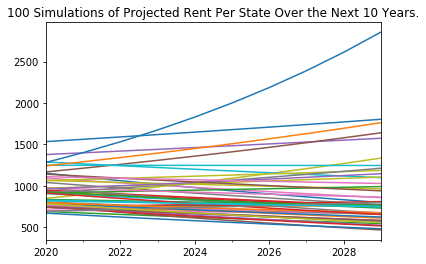

In [100]:
plot_title = f"{num_simulations} Simulations of Projected Rent Per State Over the Next {num_years} Years."
rent_per_state_monte_carlo.plot(legend=None, title=plot_title)

In [70]:
my_index = pd.date_range(start='1/1/2020', end='12/31/2029', freq='Y')
my_index

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [72]:
rent_per_state_monte_carlo.drop(0, inplace=True)

In [73]:
rent_per_state_monte_carlo.index = my_index

In [74]:
rent_per_state_monte_carlo

,Alaska,Alabama,Arkansas,Arizona,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-12-31,1152.204026,738.772526,690.633597,948.467206,1378.252271,1168.231180,1093.224189,1041.029809,1065.091757,906.297677,...,670.976502,793.562813,927.298114,913.562316,963.442873,1141.154266,1110.539084,692.230928,782.888524,819.569285
2021-12-31,1106.311765,730.635670,672.742969,925.504157,1398.806570,1213.123635,1064.237869,1007.196155,1053.315182,886.057690,...,646.852681,779.383587,903.237177,880.375638,982.245681,1116.837957,1101.158088,703.647074,753.892302,811.224411
2022-12-31,1062.247392,722.588433,655.315791,903.097060,1419.667401,1259.741205,1036.020108,974.462101,1041.668819,866.269715,...,623.596191,765.457712,879.800558,848.394521,1001.415450,1093.039793,1091.856334,715.251494,725.970026,802.964506
2023-12-31,1019.938102,714.629828,638.340059,881.232454,1440.839337,1308.150181,1008.550528,942.791910,1030.151229,846.923658,...,601.175849,751.780662,856.972057,817.575172,1020.959342,1069.748733,1082.633155,727.047291,699.081922,794.788702
2024-12-31,979.313990,706.758880,621.804077,859.897205,1462.327016,1358.419404,981.809290,912.151006,1018.760987,828.009647,...,579.561592,738.347991,834.735896,787.875387,1040.884657,1046.953971,1073.487887,739.037622,673.189685,786.696145
2025-12-31,940.307935,698.974623,605.696455,839.078497,1484.135148,1410.620358,955.777083,882.505936,1007.496685,809.518036,...,558.724439,725.155333,813.076704,759.254497,1061.198840,1024.644931,1064.419870,751.225696,648.256432,778.685987
2026-12-31,902.855491,691.276101,590.006094,818.763825,1506.268511,1464.827275,930.435108,853.824336,996.356931,791.439391,...,538.636451,712.198398,791.979511,731.673309,1081.909481,1002.811264,1055.428454,763.614774,624.246644,770.757388
2027-12-31,866.894776,683.662371,574.722187,798.940985,1528.731955,1521.117241,905.765064,826.074894,985.340347,773.764489,...,519.270692,699.472976,771.429734,705.094053,1103.024315,981.442840,1046.512990,776.208169,601.126118,762.909518
2028-12-31,832.366377,676.132499,559.834205,779.598070,1551.530404,1579.570301,881.749134,799.227313,974.445573,756.484314,...,500.601196,686.974928,751.413170,679.480333,1124.551232,960.529746,1037.672837,789.009253,578.861918,755.141556
2029-12-31,799.213242,668.685561,545.331891,760.723460,1574.668853,1640.269579,858.369975,773.252283,963.671261,739.590050,...,482.602930,674.700194,731.915983,654.797074,1146.498275,940.062278,1028.907360,802.021450,557.422328,747.452687


In [76]:
rent_per_state_monte_carlo.to_csv('Resources/rent_per_state_monte_carlo_results.csv')

In [80]:
# Setup Monte Carlo for Rent Per State
# Doing 100 simulations for each state; Will be saving the average of 100 simulations for each year.
num_simulations = 100
num_years = 10

# Initialize Dataframe
poverty_income_threshold_monte_carlo = pd.DataFrame()

x = 0
# Run the Monte Carlo Simulation
for x in range(50):
    # Getting the last unemployment from each state
    index = poverty_income_threshold.index[x]
    last_income = poverty_income_threshold.loc[index, '2019']
    
    # Running Monte Carlo Simulation
    for num in range(num_years):
        # Initialize empty list to hold simulated rates for each year
        simulated_income = [last_income]
        # Create variable to hold random values to use for simulation
        random = np.random.normal(poverty_income_threshold_stats_avg[x], poverty_income_threshold_stats_std[x], num_simulations)
        
        for year in range(num_years):
            # This will run 10 times
            # Initialize empty list to hold rates
            lista = []
            
            for i in range(num_simulations):
                # This will run 100 times
                income = simulated_income[-1]*(1+random[i])
                lista.append(income)
                
            # Append the average of each simulation to simulated_income[]
            simulated_income.append(sum(lista)/len(lista))
            
    poverty_income_threshold_monte_carlo[index] = pd.Series(simulated_income)
    x += 1

In [81]:
poverty_income_threshold_monte_carlo

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,...,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000,26370.000000
1,25854.917208,25931.723974,25889.850537,25870.399474,25880.871768,25883.273415,25893.995996,25919.928548,25883.663552,25901.530438,...,25874.320972,25874.103569,25892.259022,25877.977218,25856.438159,25852.301505,25911.092424,25917.385211,25873.373536,25900.877402
2,25349.895480,25500.732205,25418.443717,25380.264275,25400.816210,25405.530629,25426.584326,25477.538715,25406.296507,25441.383353,...,25387.959264,25387.532632,25423.173199,25395.134808,25352.878054,25344.766520,25460.171050,25472.539103,25386.100043,25440.100501
3,24854.738296,25076.903628,24955.620353,24899.415076,24929.665041,24936.605822,24967.609887,25042.699395,24937.733443,24989.410895,...,24910.739735,24910.111819,24962.585728,24921.301480,24859.124898,24847.195512,25017.096898,25035.328336,24908.003377,24987.520826
4,24369.252972,24660.119188,24501.224156,24427.675946,24467.253097,24476.336236,24516.920382,24615.281720,24477.811990,24545.467839,...,24442.490541,24441.669060,24510.342644,24456.309137,24374.987699,24359.392869,24581.733406,24605.621857,24438.910710,24542.992548
5,23893.250588,24250.261811,24055.101683,23964.874287,24013.418275,24024.562116,24074.366257,24195.159020,24026.372774,24109.411542,...,23983.043065,23982.035520,24066.292774,23999.992820,23900.279184,23881.166816,24153.946387,24183.290861,23978.652469,24106.372434
6,23426.545915,23847.216366,23617.102284,23510.840771,23568.001482,23581.126657,23639.800663,23782.206788,23583.259357,23681.101892,...,23532.231860,23531.045538,23630.287683,23552.190650,23434.815726,23412.329345,23733.603990,23768.208756,23527.062276,23677.519796
7,22968.957341,23450.869638,23187.078052,23065.409280,23130.846575,23145.875946,23213.079398,23376.302641,23148.318190,23260.401268,...,23089.894590,23088.536570,23202.181625,23112.743764,22978.417277,22952.696138,23320.576661,23360.251122,23083.976886,23256.296451
8,22520.306803,23061.110291,22764.883776,22628.416842,22701.800307,22718.658913,22794.060865,22977.326286,22721.398552,22847.174496,...,22655.871970,22654.349126,22781.831495,22681.496268,22530.907293,22502.086497,22914.737096,22959.295675,22649.236127,22842.566675
9,22080.419715,22677.828844,22350.376885,22199.703571,22280.712273,22299.327277,22382.606021,22585.159482,22302.352505,22441.288799,...,22230.007708,22228.326719,22369.096779,22258.295172,22092.112670,22060.323270,22515.960211,22565.222229,22222.682845,22436.197156


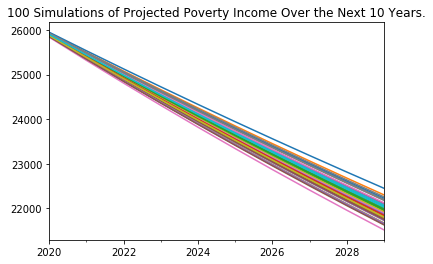

In [101]:
plot_title = f"{num_simulations} Simulations of Projected Poverty Income Over the Next {num_years} Years."
poverty_income_threshold_monte_carlo.plot(legend=None, title=plot_title)

In [83]:
my_index = pd.date_range(start='1/1/2020', end='12/31/2029', freq='Y')
my_index

DatetimeIndex(['2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [84]:
poverty_income_threshold_monte_carlo.drop(0, inplace=True)

In [85]:
poverty_income_threshold_monte_carlo.index = my_index

In [86]:
poverty_income_threshold_monte_carlo

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-12-31,25854.917208,25931.723974,25889.850537,25870.399474,25880.871768,25883.273415,25893.995996,25919.928548,25883.663552,25901.530438,...,25874.320972,25874.103569,25892.259022,25877.977218,25856.438159,25852.301505,25911.092424,25917.385211,25873.373536,25900.877402
2021-12-31,25349.895480,25500.732205,25418.443717,25380.264275,25400.816210,25405.530629,25426.584326,25477.538715,25406.296507,25441.383353,...,25387.959264,25387.532632,25423.173199,25395.134808,25352.878054,25344.766520,25460.171050,25472.539103,25386.100043,25440.100501
2022-12-31,24854.738296,25076.903628,24955.620353,24899.415076,24929.665041,24936.605822,24967.609887,25042.699395,24937.733443,24989.410895,...,24910.739735,24910.111819,24962.585728,24921.301480,24859.124898,24847.195512,25017.096898,25035.328336,24908.003377,24987.520826
2023-12-31,24369.252972,24660.119188,24501.224156,24427.675946,24467.253097,24476.336236,24516.920382,24615.281720,24477.811990,24545.467839,...,24442.490541,24441.669060,24510.342644,24456.309137,24374.987699,24359.392869,24581.733406,24605.621857,24438.910710,24542.992548
2024-12-31,23893.250588,24250.261811,24055.101683,23964.874287,24013.418275,24024.562116,24074.366257,24195.159020,24026.372774,24109.411542,...,23983.043065,23982.035520,24066.292774,23999.992820,23900.279184,23881.166816,24153.946387,24183.290861,23978.652469,24106.372434
2025-12-31,23426.545915,23847.216366,23617.102284,23510.840771,23568.001482,23581.126657,23639.800663,23782.206788,23583.259357,23681.101892,...,23532.231860,23531.045538,23630.287683,23552.190650,23434.815726,23412.329345,23733.603990,23768.208756,23527.062276,23677.519796
2026-12-31,22968.957341,23450.869638,23187.078052,23065.409280,23130.846575,23145.875946,23213.079398,23376.302641,23148.318190,23260.401268,...,23089.894590,23088.536570,23202.181625,23112.743764,22978.417277,22952.696138,23320.576661,23360.251122,23083.976886,23256.296451
2027-12-31,22520.306803,23061.110291,22764.883776,22628.416842,22701.800307,22718.658913,22794.060865,22977.326286,22721.398552,22847.174496,...,22655.871970,22654.349126,22781.831495,22681.496268,22530.907293,22502.086497,22914.737096,22959.295675,22649.236127,22842.566675
2028-12-31,22080.419715,22677.828844,22350.376885,22199.703571,22280.712273,22299.327277,22382.606021,22585.159482,22302.352505,22441.288799,...,22230.007708,22228.326719,22369.096779,22258.295172,22092.112670,22060.323270,22515.960211,22565.222229,22222.682845,22436.197156
2029-12-31,21649.124902,22300.917630,21943.417406,21779.112612,21867.434859,21887.735490,21978.578335,22199.686008,21891.034838,22042.613761,...,21812.148451,21810.315802,21963.839511,21842.990344,21661.863673,21627.232782,22124.123096,22177.912661,21804.162845,22037.056955


In [87]:
poverty_income_threshold_monte_carlo.to_csv('Resources/poverty_income_threshold_monte_carlo_results.csv')